# Comparison notebook

In [90]:
library(dplyr)
library(ggplot2)
library(data.table)
library(ROCR)
library(pROC)
library(pscl)

ERROR: Error in library(forcast): there is no package called ‘forcast’


In [36]:
no_prsice_thr = 7
no_lasso_thr = 4

In [4]:
# Project directory
setwd('/lustre1/project/stg_00092/IBP_PRSproject/1_Intestinal_Bowel_Disease/')

In [5]:
# Phenotypes file
phenos <- read.table("data/final_phenotypes.txt", header=T)
colnames(phenos) <- c("IID", "IID.1", "phenos")

## Get each tools results and standardize them

### 1. PLINK

#### Target data

#### External data

### 2. PRSice

#### Target data

In [6]:
target_prs.prsice <- read.table("output_data/a_2_julia_prsice/target_data/IBD_GSA_fin.all_score", header = T)
target_prs.prsice <- merge(target_prs.prsice, phenos, by = "IID")
head(target_prs.prsice)

,IID,FID,Pt_5e.08,Pt_1e.05,Pt_0.01,Pt_0.05,Pt_0.1,Pt_0.5,Pt_1,IID.1,phenos
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,1,1,-0.03166229,-0.02142323,0.001843741,0.003297842,0.002991321,0.001855687,0.001412658,1,2
2,2,2,-0.02766262,-0.01827174,0.001946175,0.003367056,0.003067745,0.001884347,0.001431937,2,2
3,3,3,-0.02407093,-0.01695398,0.001857481,0.003281909,0.002991849,0.001853512,0.001410655,3,2
4,5,5,-0.02722841,-0.01864913,0.002081904,0.003424561,0.003078933,0.001885277,0.001432813,5,2
5,7,7,-0.02779718,-0.01836615,0.001941422,0.003371951,0.003046175,0.001889901,0.001436709,7,2
6,8,8,-0.02822326,-0.01864416,0.001920985,0.003371647,0.003033148,0.001873807,0.001423825,8,2


In [7]:
## FILL WITH THE POSITION IN WHICH THE SCORES START
starting_scores_pos = 3

#### External data

In [8]:
external_prs.prsice <- read.table("output_data/a_2_julia_prsice/external_data/1000G_EUR_fin.all_score", header = T)


#### Standardization

In [9]:
ext_scores.prsice <- external_prs.prsice[,starting_scores_pos:(starting_scores_pos+no_prsice_thr-1)]

ext_mean.prsice <- as.data.frame(colMeans(ext_scores.prsice))
ext_sd.prsice <- as.data.frame(apply(ext_scores.prsice, 2, sd))

colnames(ext_mean.prsice) <- c("ext_mean.prsice")
colnames(ext_sd.prsice) <- c("ext_sd.prsice")

#ext_mean.prsice
#ext_sd.prsice


In [10]:
# Before standardization
head(target_prs.prsice)

std_names <- colnames(target_prs.prsice)

for (sc in c(starting_scores_pos:(starting_scores_pos+no_prsice_thr-1))) {
    std_names[sc] <- paste(colnames(target_prs.prsice)[sc], "_std", sep="")
}

std_prs.prsice <- target_prs.prsice
colnames(std_prs.prsice) <- std_names

c(starting_scores_pos:(starting_scores_pos+no_prsice_thr-1))

for (sc in c(starting_scores_pos:(starting_scores_pos+no_prsice_thr-1))) {
    col_name <- std_names[sc]
    mean <- ext_mean.prsice[(sc-starting_scores_pos+1),1]
    stdv <- ext_sd.prsice[(sc-starting_scores_pos+1),1]
    std_prs.prsice[,sc] <- (target_prs.prsice[,sc] - mean) / stdv
}

head(std_prs.prsice)
#target_prs.prsice[,3]


,IID,FID,Pt_5e.08,Pt_1e.05,Pt_0.01,Pt_0.05,Pt_0.1,Pt_0.5,Pt_1,IID.1,phenos
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,1,1,-0.03166229,-0.02142323,0.001843741,0.003297842,0.002991321,0.001855687,0.001412658,1,2
2,2,2,-0.02766262,-0.01827174,0.001946175,0.003367056,0.003067745,0.001884347,0.001431937,2,2
3,3,3,-0.02407093,-0.01695398,0.001857481,0.003281909,0.002991849,0.001853512,0.001410655,3,2
4,5,5,-0.02722841,-0.01864913,0.002081904,0.003424561,0.003078933,0.001885277,0.001432813,5,2
5,7,7,-0.02779718,-0.01836615,0.001941422,0.003371951,0.003046175,0.001889901,0.001436709,7,2
6,8,8,-0.02822326,-0.01864416,0.001920985,0.003371647,0.003033148,0.001873807,0.001423825,8,2


[1] 3 4 5 6 7 8 9

,IID,FID,Pt_5e.08_std,Pt_1e.05_std,Pt_0.01_std,Pt_0.05_std,Pt_0.1_std,Pt_0.5_std,Pt_1_std,IID.1,phenos
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,1,1,0.892643,-0.7488975,9.183041,16.44233,13.46547,15.77816,15.77073,1,2
2,2,2,2.221322,1.3700918,10.014131,17.47348,14.99605,16.97101,16.85734,2,2
3,3,3,3.414473,2.2561257,9.294519,16.20497,13.47603,15.68763,15.65784,3,2
4,5,5,2.365568,1.1163427,11.115365,18.33018,15.22011,17.00972,16.90668,5,2
5,7,7,2.176624,1.3066127,9.975569,17.54640,14.56406,17.20217,17.12630,7,2
6,8,8,2.035082,1.1196836,9.809752,17.54187,14.30316,16.53234,16.40011,8,2


#### Update the phenotypes

In [11]:
std_prs_ph.prsice <- std_prs.prsice
std_prs_ph.prsice$phenos <- std_prs_ph.prsice$phenos - 1


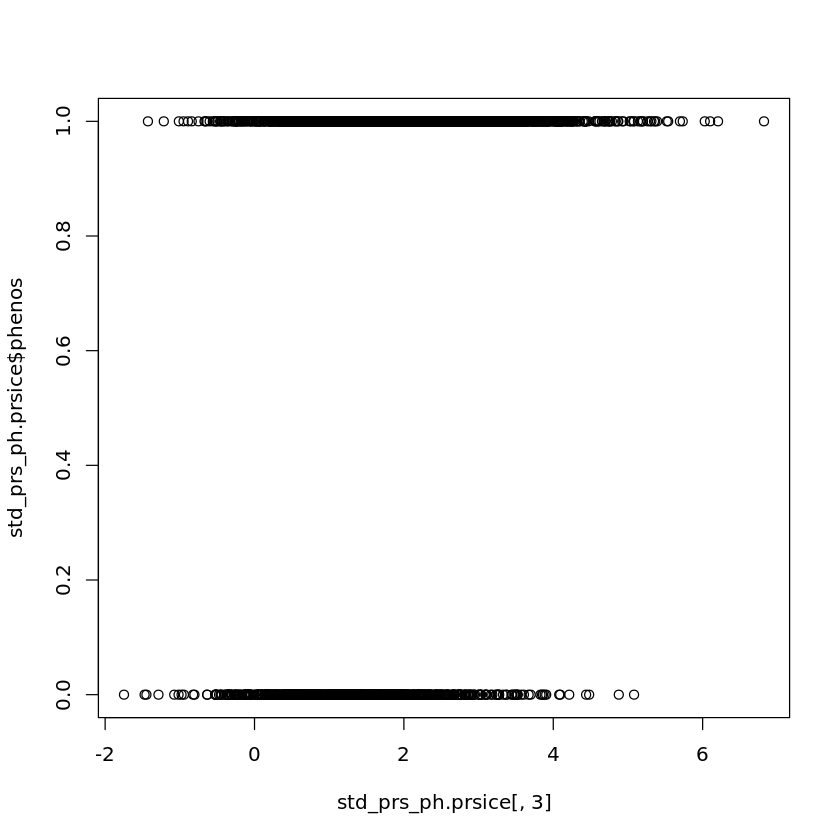

In [12]:
plot(std_prs_ph.prsice[,3], std_prs_ph.prsice$phenos)

In [13]:
colnames(std_prs_ph.prsice)

[1] "IID"          "FID"          "Pt_5e.08_std" "Pt_1e.05_std" "Pt_0.01_std" 
 [6] "Pt_0.05_std"  "Pt_0.1_std"   "Pt_0.5_std"   "Pt_1_std"     "IID.1"       
[11] "phenos"

In [14]:
# construct logistic regression to see which is the best of the four
log_model.prsice.1 <- glm(phenos ~ Pt_5e.08_std, data = std_prs_ph.prsice, family = binomial(link = "logit"))
log_model.prsice.2 <- glm(phenos ~ Pt_1e.05_std, data = std_prs_ph.prsice, family = binomial(link = "logit"))
log_model.prsice.3 <- glm(phenos ~ Pt_0.01_std, data = std_prs_ph.prsice, family = binomial(link = "logit"))
log_model.prsice.4 <- glm(phenos ~ Pt_0.05_std, data = std_prs_ph.prsice, family = binomial(link = "logit"))
log_model.prsice.5 <- glm(phenos ~ Pt_0.1_std, data = std_prs_ph.prsice, family = binomial(link = "logit"))
log_model.prsice.6 <- glm(phenos ~ Pt_0.5_std, data = std_prs_ph.prsice, family = binomial(link = "logit"))
log_model.prsice.7 <- glm(phenos ~ Pt_1_std, data = std_prs_ph.prsice, family = binomial(link = "logit"))

In [15]:
#make a list of the explained variance
explained_var.prsice <- c(with(summary(log_model.prsice.1), 1 - deviance/null.deviance), 
                          with(summary(log_model.prsice.2), 1 - deviance/null.deviance), 
                          with(summary(log_model.prsice.3), 1 - deviance/null.deviance), 
                          with(summary(log_model.prsice.4), 1 - deviance/null.deviance), 
                          with(summary(log_model.prsice.5), 1 - deviance/null.deviance), 
                          with(summary(log_model.prsice.6), 1 - deviance/null.deviance), 
                          with(summary(log_model.prsice.7), 1 - deviance/null.deviance))

In [17]:
head(std_prs_ph.prsice)

,IID,FID,Pt_5e.08_std,Pt_1e.05_std,Pt_0.01_std,Pt_0.05_std,Pt_0.1_std,Pt_0.5_std,Pt_1_std,IID.1,phenos
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1,1,0.892643,-0.7488975,9.183041,16.44233,13.46547,15.77816,15.77073,1,1
2,2,2,2.221322,1.3700918,10.014131,17.47348,14.99605,16.97101,16.85734,2,1
3,3,3,3.414473,2.2561257,9.294519,16.20497,13.47603,15.68763,15.65784,3,1
4,5,5,2.365568,1.1163427,11.115365,18.33018,15.22011,17.00972,16.90668,5,1
5,7,7,2.176624,1.3066127,9.975569,17.54640,14.56406,17.20217,17.12630,7,1
6,8,8,2.035082,1.1196836,9.809752,17.54187,14.30316,16.53234,16.40011,8,1


In [26]:
#obtain the highest explained variance 
best_prs.prsice <- which.max(explained_var.prsice)
best_prs.prsice

#obtain the best prs by indexing from which model had the best explained variance
best_target.prsice <- std_prs_ph.prsice %>% select(1, 2, (starting_scores_pos+best_prs.prsice-1), (starting_scores_pos+no_prsice_thr+1)) #Pt_5e.08
best_target.prsice <- best_target.prsice[complete.cases(best_target.prsice), ]
colnames(best_target.prsice) <- c('IID', 'FID', 'std_prs', 'phenos')
head(best_target.prsice)

[1] 2

,IID,FID,std_prs,phenos
,<int>,<int>,<dbl>,<dbl>
1,1,1,-0.7488975,1
2,2,2,1.3700918,1
3,3,3,2.2561257,1
4,5,5,1.1163427,1
5,7,7,1.3066127,1
6,8,8,1.1196836,1


In [27]:
#recode phenotype into a factor
best_target.prsice$phenos <- as.factor(best_target.prsice$phenos)

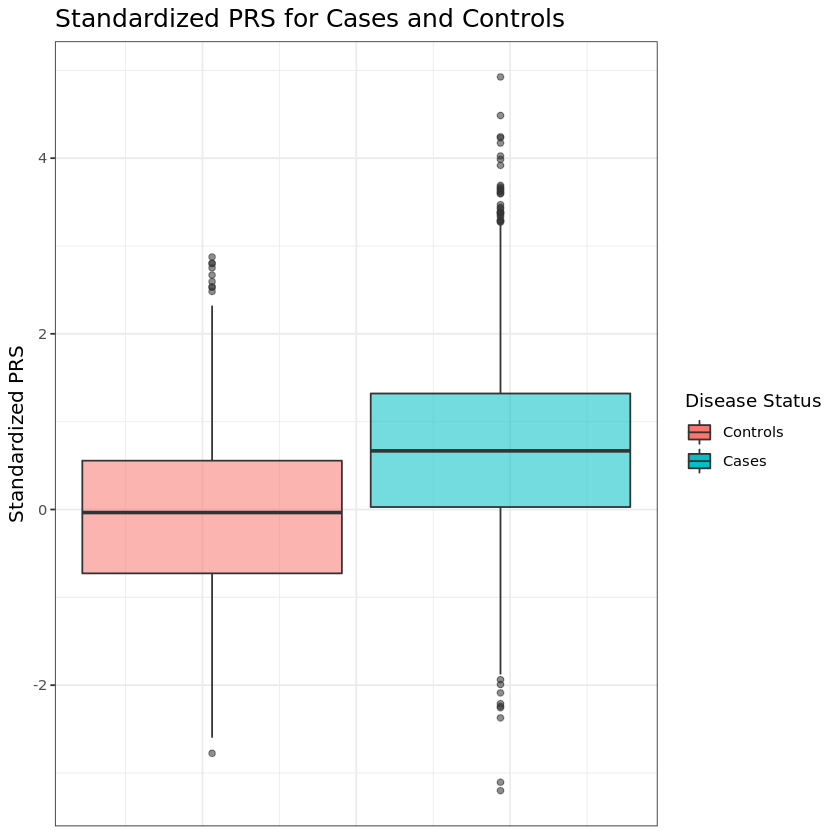

In [28]:
#make boxplot
ggplot(best_target.prsice, aes(y = std_prs, group = phenos, fill = phenos, alpha = 0.5)) +
labs(title = "Standardized PRS for Cases and Controls", y = "Standardized PRS", fill = 'Disease Status')+
geom_boxplot() + guides (alpha = "none") + theme_bw() + 
theme(plot.title = element_text(size=15), axis.title.y =  element_text(size=12), axis.text.x=element_blank(),
      axis.ticks.x=element_blank()) + scale_fill_discrete(labels = c("Controls","Cases"))

In [41]:
setwd("/lustre1/project/stg_00092/IBP_PRSproject/1_Intestinal_Bowel_Disease/output_data/")

#need to write table for best prs
write.table(best_target.prsice, "005_comparison/best_prs_prsice.txt", col.names = TRUE, row.names = FALSE, quote = FALSE)


### 3. LassoSum

#### Target data

In [40]:
setwd("/lustre1/project/stg_00092/IBP_PRSproject/1_Intestinal_Bowel_Disease/output_data/")

#read in scores
target.prs.lasso.1 <- read.table("a_3_julia_lasso/target_data/IBD_GSA_fin_prs_lasso1.txt", header = T)
target.prs.lasso.2 <- read.table("a_3_julia_lasso/target_data/IBD_GSA_fin_prs_lasso2.txt", header = T)
target.prs.lasso.3 <- read.table("a_3_julia_lasso/target_data/IBD_GSA_fin_prs_lasso3.txt", header = T)
target.prs.lasso.4 <- read.table("a_3_julia_lasso/target_data/IBD_GSA_fin_prs_lasso4.txt", header = T)

target.prs.lasso.1

FID,IID,pheno,order,best.pgs
<int>,<int>,<int>,<int>,<dbl>
9263,9263,1,1,0.0021582505
9535,9535,2,2,0.0027418432
5924,5924,2,3,0.0164585569
2762,2762,2,4,0.0361405213
9323,9323,1,5,-0.0008704532
7670,7670,2,6,-0.0175779430
1885,1885,2,7,0.0024824755
8711,8711,2,8,-0.0084915690
10127,10127,1,9,0.0185858206


#### External data

### 4. LDpred

#### Target data

#### External data

## Comparison

In [54]:
setwd('/lustre1/project/stg_00092/IBP_PRSproject/1_Intestinal_Bowel_Disease/output_data/005_comparison')

In [58]:
#write.table(best_target.prsice, "005_comparison/best_prs_prsice.txt", col.names = TRUE, row.names = FALSE, quote = FALSE)
#write.table(best_target.lasso, "005_comparison/best_prs_lassoSum.txt", col.names = TRUE, row.names = FALSE, quote = FALSE)
# write.table(best_target.plink, "005_comparison/best_prs_plink.txt", col.names = TRUE, row.names = FALSE, quote = FALSE)
best_target.plink <- read.table("best_prs_plink.txt", header=T)
best_target.prsice <- read.table("best_prs_prsice.txt", header=T)
best_target.lasso <- read.table("best_prs_lassoSum.txt", header=T)


In [59]:
plink.roc <- roc(best_target.plink$pheno, best_target.plink$std_prs, smooth = F)
prsice.roc <- roc(best_target.prsice$phenos, best_target.prsice$std_prs, smooth = F)
lasso.roc <- roc(best_target.lasso$pheno, best_target.lasso$std_prs, smooth = F)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



In [60]:
#do the bootstrapping 
plink.roc.ci <- ci.auc(plink.roc, method = "bootstrap", boot.n = 1000, boot.stratified = TRUE)
prsice.roc.ci <- ci.auc(prsice.roc, method = "bootstrap", boot.n = 1000, boot.stratified = TRUE)
lasso.roc.ci <- ci.auc(lasso.roc, method = "bootstrap", boot.n = 1000, boot.stratified = TRUE)

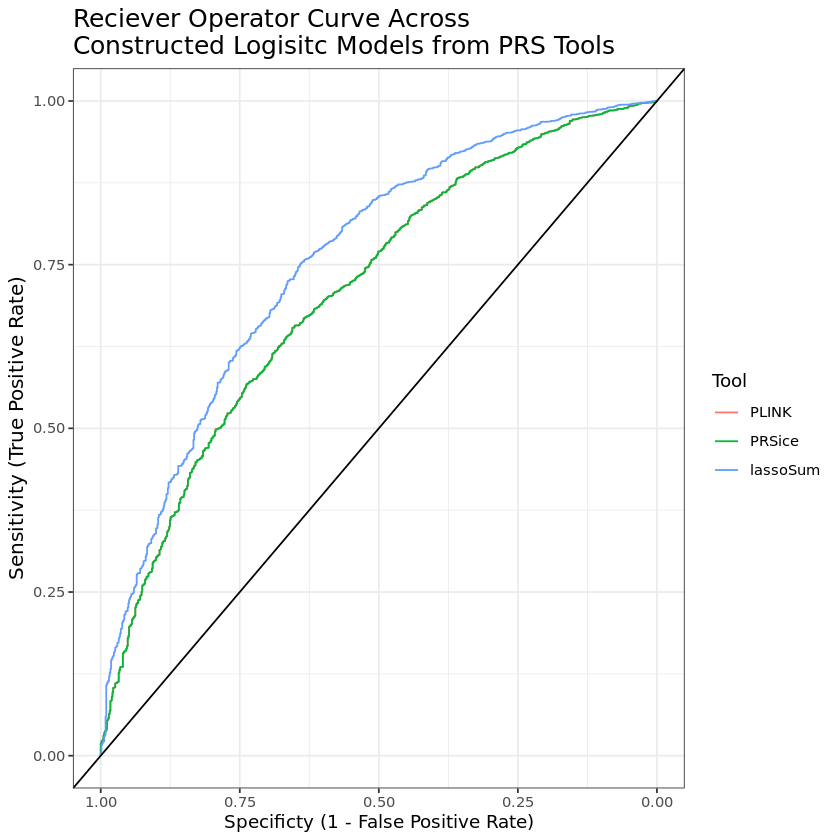

In [79]:
#plot the roc curve
#to add more curves just add the roc output to the list
#example: `list(lasso=lasso.roc, PLINK = plink.roc)

ggroc(list(PLINK=plink.roc, PRSice=prsice.roc, lassoSum=lasso.roc)) + 
labs(title = "Reciever Operator Curve Across\nConstructed Logisitc Models from PRS Tools ",y = "Sensitivity (True Positive Rate)", x = "Specificty (1 - False Positive Rate)", col = "Tool") +
theme_bw() + theme(plot.title = element_text(size=15), axis.title.y = element_text(size=12)) +
geom_abline(intercept = 1, slope = 1)


In [ ]:
# scale_color_manual(values=c("PLINK" = "blue","PRSice" = "red", "lassoSum" = "green"),labels=c("PLINK", "PRSice", "lassoSum")) +
# scale_linetype_manual(breaks = c("PLINK", "PRSice", "lassoSum"), values=c("b","dashed","solid"), labels=c("PLINK", "PRSice", "lassoSum") ) +


In [62]:
#write a function to allow for rounding
scaleFUN <- function(x) sprintf("%.3f", x)

In [63]:
#create a dataframe for the auc metric 
performance_metrics_auc <- data.frame(matrix(ncol = 4, nrow = 0))


#enter the estimates
plink_perform_auc <- c('PLINK', plink.roc.ci[1],plink.roc.ci[2],plink.roc.ci[3])
prsice_perform_auc <- c("PRSice",prsice.roc.ci[1],prsice.roc.ci[2],prsice.roc.ci[3])
lasso_perform_auc <- c("lassoSum",lasso.roc.ci[1],lasso.roc.ci[2],lasso.roc.ci[3])
ldpred_perform_auc_FAKE <- c('LDpred_fake', 0.6734, 0.73241, 0.7876)

#combine with the empty dataframe
performance_metrics_auc <- rbind(performance_metrics_auc, 
                                 plink_perform_auc, prsice_perform_auc, 
                                 lasso_perform_auc, ldpred_perform_auc_FAKE)
#rename the columns of the dataframe
colnames(performance_metrics_auc) <- c("tool", "lower_95", "estimate", "upper_95")

In [64]:
#make the dataframe columns numeric
performance_metrics_auc$lower_95 <- as.numeric(performance_metrics_auc$lower_95)
performance_metrics_auc$estimate <- as.numeric(performance_metrics_auc$estimate)
performance_metrics_auc$upper_95 <- as.numeric(performance_metrics_auc$upper_95)
head(performance_metrics_auc)

,tool,lower_95,estimate,upper_95
,<chr>,<dbl>,<dbl>,<dbl>
1,PLINK,0.6895962,0.7077910,0.7280973
2,PRSice,0.6875811,0.7072312,0.7265420
3,lassoSum,0.7355742,0.7551702,0.7744640
4,LDpred_fake,0.6734000,0.7324100,0.7876000


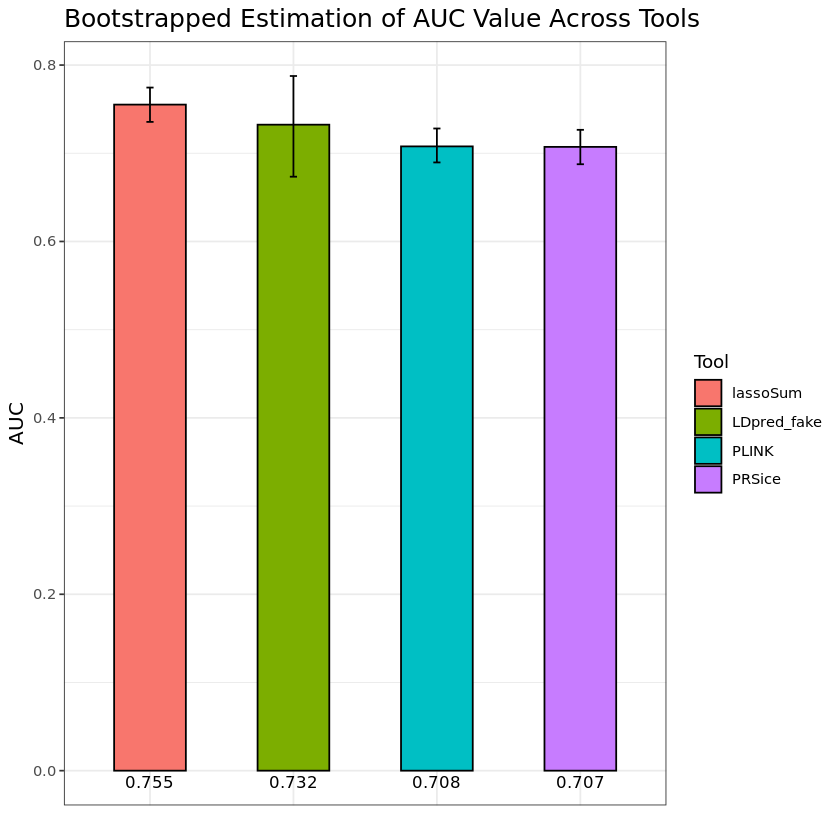

In [88]:
#make the r-sqr plot
ggplot(performance_metrics_auc, aes(y = estimate, x = tool, fill = tool)) + geom_bar(stat = "identity", width = 0.5, size =0.5, color = "black")+
labs(title = bquote("Bootstrapped Estimation of AUC Value Across Tools"), y = "AUC", x = '', fill = 'Tool') +
theme_bw() + geom_text(aes(label=scaleFUN(estimate)), vjust=0, size=3.5,y = -0.02) +
theme(plot.title = element_text(size=15), axis.title.y = element_text(size=12), axis.text.x=element_blank(),
      axis.ticks.x=element_blank())+
geom_errorbar(aes(ymin = lower_95, ymax = upper_95), width = 0.05) 

Do CV with logisitic regression to obtain confidence intervals for the r-sqr metric

In [81]:
#bootstrap
n <- nrow(best_target.plink)
resamples <- 1000

bootstrap_pseudor2_plink <- sapply(1:resamples, function(j) {
  bootstraps <- sample(c(1:n), n, TRUE)
  pR2(glm(best_target.plink$pheno[bootstraps] ~ best_target.plink$std_prs[bootstraps], 
          family = binomial("logit")))[["McFadden"]]
})

bootstrap_pseudor2_prsice <- sapply(1:resamples, function(j) {
  bootstraps <- sample(c(1:n), n, TRUE)
  pR2(glm(best_target.prsice$phenos[bootstraps] ~ best_target.prsice$std_prs[bootstraps], 
          family = binomial("logit")))[["McFadden"]]
})

bootstrap_pseudor2_lasso <- sapply(1:resamples, function(j) {
  bootstraps <- sample(c(1:n), n, TRUE)
  pR2(glm(best_target.lasso$pheno[bootstraps] ~ best_target.lasso$std_prs[bootstraps], 
          family = binomial("logit")))[["McFadden"]]
})

fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting nu

fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting nu

fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting null model for pseudo-r2
fitting nu

In [82]:
#save the upper and lower bounds, as the estimate
lower_95_plink <- mean(bootstrap_pseudor2_plink) - 1.96 * sd(bootstrap_pseudor2_plink)
r_sqr_est_plink <-mean(bootstrap_pseudor2_plink)
upper_95_plink <- mean(bootstrap_pseudor2_plink) + 1.96 * sd(bootstrap_pseudor2_plink)

lower_95_prsice <- mean(bootstrap_pseudor2_prsice) - 1.96 * sd(bootstrap_pseudor2_prsice)
r_sqr_est_prsice <-mean(bootstrap_pseudor2_prsice)
upper_95_prsice <- mean(bootstrap_pseudor2_prsice) + 1.96 * sd(bootstrap_pseudor2_prsice)

lower_95_lasso <- mean(bootstrap_pseudor2_lasso) - 1.96 * sd(bootstrap_pseudor2_lasso)
r_sqr_est_lasso <-mean(bootstrap_pseudor2_lasso)
upper_95_lasso <- mean(bootstrap_pseudor2_lasso) + 1.96 * sd(bootstrap_pseudor2_lasso)

In [83]:
#create an empty dataframe
performance_metrics_rsqr <- data.frame(matrix(ncol = 4, nrow = 0))

#enter the lassoSum estimates
lasso_perform_rsqr <- c("lassoSum", lower_95_lasso, r_sqr_est_lasso ,upper_95_lasso)


plink_perform_rsqr <- c('PLINK', lower_95_plink, r_sqr_est_plink ,upper_95_plink)
prsice_perform_rsqr <- c("PRSice",lower_95_prsice, r_sqr_est_prsice ,upper_95_prsice)
lasso_perform_rsqr <- c("lassoSum",lower_95_lasso, r_sqr_est_lasso ,upper_95_lasso)
ldpred_perform_rsqr_FAKE <- c('LDpred_FAKE', 0.0234, 0.063241, 0.0876)


#combine with the empty dataframe
performance_metrics_rsqr <- rbind(performance_metrics_rsqr, plink_perform_rsqr,
                                  prsice_perform_rsqr,lasso_perform_rsqr,ldpred_perform_rsqr_FAKE)
#rename the columns of the dataframe
colnames(performance_metrics_rsqr) <- c("tool", "lower_95", "estimate", "upper_95")

In [84]:
#make the dataframe columns numeric
performance_metrics_rsqr$lower_95 <- as.numeric(performance_metrics_rsqr$lower_95)
performance_metrics_rsqr$estimate <- as.numeric(performance_metrics_rsqr$estimate)
performance_metrics_rsqr$upper_95 <- as.numeric(performance_metrics_rsqr$upper_95)
head(performance_metrics_rsqr)

,tool,lower_95,estimate,upper_95
,<chr>,<dbl>,<dbl>,<dbl>
1,PLINK,0.07314267,0.09124199,0.1093413
2,PRSice,0.07346262,0.09115951,0.1088564
3,lassoSum,0.12001487,0.14256629,0.1651177
4,LDpred_FAKE,0.02340000,0.06324100,0.0876000


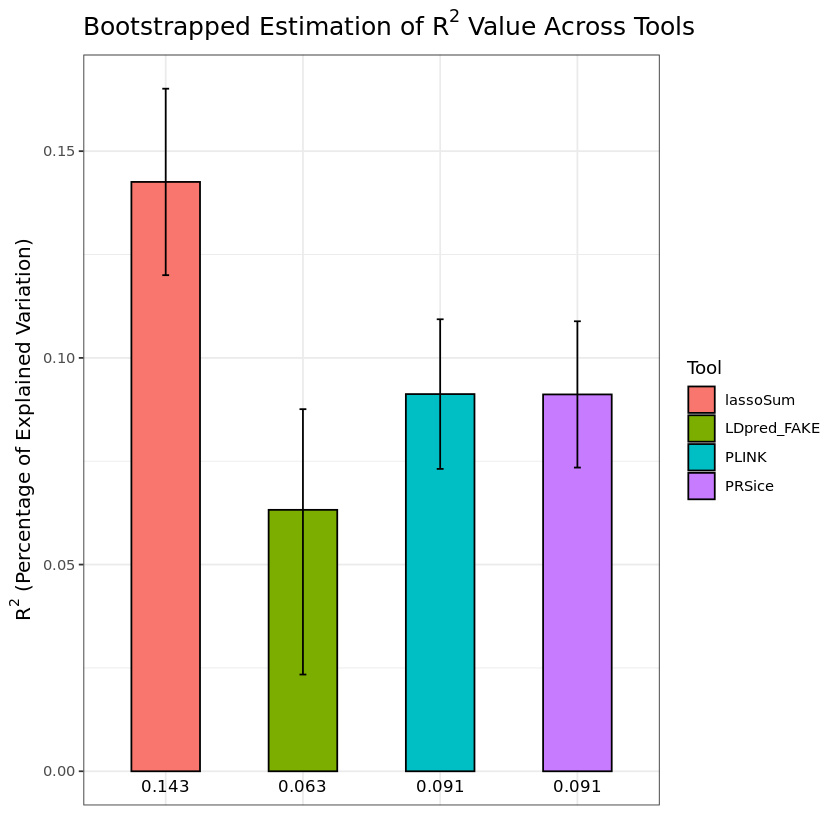

In [85]:
#make the r-sqr plot
ggplot(performance_metrics_rsqr, aes(y = estimate, x = tool, fill = tool)) + geom_bar(stat = "identity", width = 0.5, size =0.5, color = "black")+
labs(title = bquote("Bootstrapped Estimation of"~R^2~"Value Across Tools"), y = bquote(R^2~"(Percentage of Explained Variation)"), x = '', fill = 'Tool') +
theme_bw() + geom_text(aes(label=scaleFUN(estimate)), vjust=0, size=3.5,y = -0.005) +
theme(plot.title = element_text(size=15), axis.title.y = element_text(size=12), axis.text.x=element_blank(),
      axis.ticks.x=element_blank())+
geom_errorbar(aes(ymin = lower_95, ymax = upper_95), width = 0.05) 

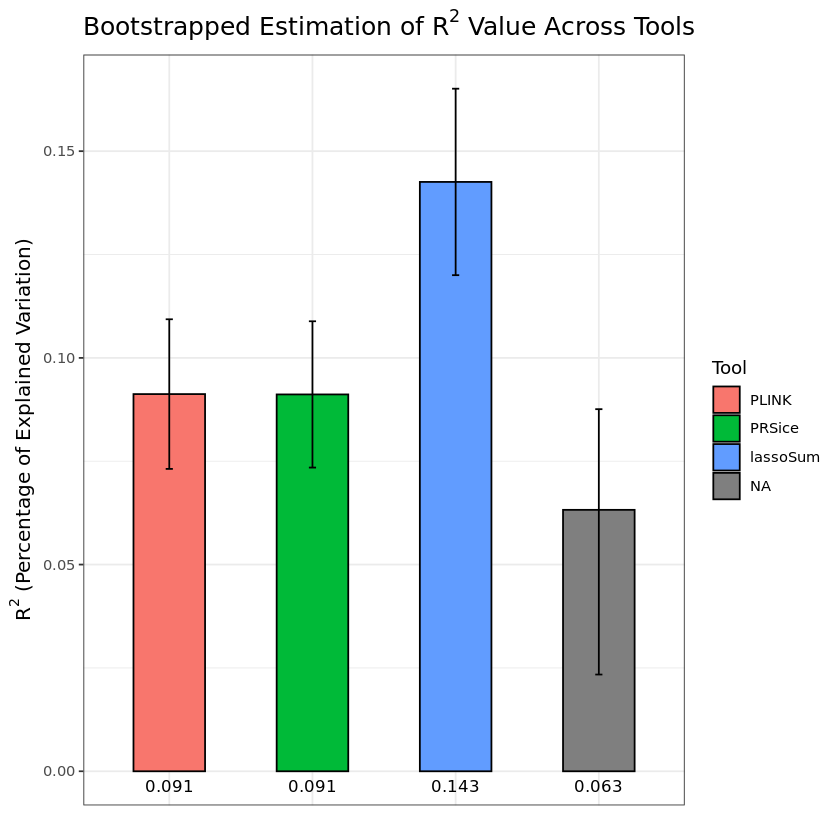

In [92]:
#make the r-sqr plot
performance_metrics_rsqr %>%
    arrange(estimate) %>%
    mutate(tool = factor(tool, levels=c('PLINK', 'PRSice', 'lassoSum', 'LDpred'))) %>%
    ggplot(aes(y = estimate, x = tool, fill = tool)) + geom_bar(stat = "identity", width = 0.5, size =0.5, color = "black")+
    labs(title = bquote("Bootstrapped Estimation of"~R^2~"Value Across Tools"), y = bquote(R^2~"(Percentage of Explained Variation)"), x = '', fill = 'Tool') +
    theme_bw() + geom_text(aes(label=scaleFUN(estimate)), vjust=0, size=3.5,y = -0.005) +
    theme(plot.title = element_text(size=15), axis.title.y = element_text(size=12), axis.text.x=element_blank(),
          axis.ticks.x=element_blank())+
    geom_errorbar(aes(ymin = lower_95, ymax = upper_95), width = 0.05) 